# Model Evaluation

In [1]:
# Import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Image
from tqdm import tqdm

# Open file
import os
import PIL
import cv2
from os import listdir
from random import shuffle

# Model CNN (Deep learning network)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,\
GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report,f1_score

In [2]:
def create_label(word_label):
    ''' 
        Input : subdirectories path have nane file with class label 
        Return : number of classes label of each class 
    '''
    if word_label == "Coccidiosis":
        return 0
    elif word_label == "Healthy poultry":
        return 1
    elif word_label == "Newcastle diseases":
        return 2
    elif word_label == "Salmonella":
        return 3

In [3]:
def created_dataset(DIR):
    '''
        Input : directories file have image file to want label   
        Return : dataframe of arrary image (RGB-3D shape) follow by img_height and img_width and label of each classes image 
    '''
    created_dataset = []
    for labels_c in tqdm(os.listdir(DIR)):
        path = os.path.join(DIR, labels_c)
        for file in listdir(path):
            img_data = cv2.imread(path+ "/" + file) 
            img_data = cv2.resize(img_data, (img_height , img_width))
            img_data = cv2.cvtColor(img_data, cv2.COLOR_RGB2BGR)
            created_dataset.append([np.array(img_data), create_label(labels_c)])
    shuffle(created_dataset)
    return pd.DataFrame(created_dataset, columns=["picture","labels"])

In [4]:
def load_model(model_path):
    '''
        Input : subdirectories of model 
        Return : model of keras api with not complie 
    '''
    model = tf.keras.models.load_model(model_path, compile = False)
    return model

In [5]:
# Create function plot graph
def plot_graph(history_model, finetune=False, initial_epochs=0):
    ''' 
        Input : Model_values of keras.callbacks.History
        Return : Graph of Loss funtion and Mean squared error between training dataset and testing dataset
    '''
    # Subplots
    fig, ax = plt.subplots(1, 2, figsize=(14,5))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history_model['loss'], label='Training Loss');
    plt.plot(history_model['val_loss'], label='Testing Loss');
    if finetune==True:
        plt.plot([initial_epochs-1,initial_epochs-1], plt.ylim(), label='Start Fine Tuning')
    plt.legend(fontsize=12, loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss');
    
    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history_model['accuracy'], label='Training Accuracy')
    plt.plot(history_model['val_accuracy'], label='Validation Accuracy')
    if finetune==True:
        plt.plot([initial_epochs-1,initial_epochs-1], plt.ylim(), label='Start Fine Tuning')
    plt.legend(fontsize=12, loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy');

In [6]:
def get_metric(model, X, y_actual, name_model=None, figsize=(12, 10)):
    '''
    Input : model = model of keras api 
            X = array of image follow by reshape and rescale fit for model input 
            y_actual = label of each image(X)
            name_model = str name of model want to show 
    Return : ConfusionMatrixDisplay, accuracy_score, and size of the model 
    '''
    prods_softmax = model.predict(X)
    y_preds = np.array([np.where(v == v.max())[0][0] for v in prods_softmax])
    print(f"Model : {name_model}")
    print("-" * 50)
    labels = ['Coccidiosis', 'Salmonella', 'Newcastle', 'Healthy']
    cm = confusion_matrix(y_actual, y_preds)

    # Increase the size of the figure
    plt.figure(figsize=figsize)

    # # Rotate x-axis labels for better readability
    # plt.xticks(rotation=45)

    # Plot the confusion matrix
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels).plot(cmap=plt.cm.Blues);

    print(classification_report(y_actual, y_preds, target_names=labels))
    print(f"Accuracy score: {round(accuracy_score(y_actual, y_preds), 2)}")
    print(f"F1 score average: {round(f1_score(y_actual, y_preds, average='macro'), 2)}")


# def get_metric(model, X,  y_actual, name_model=None):
#     '''
#         Input : model = model of keras api 
#                 X = array of image follow by reshape and rescale fit for model input 
#                 y_actual = label of each image(X)
#                 name_model = str name of model want to show 
#         Return : ConfusionMatrixDisplay, accuracy_score and size of model 
#     '''
#     prods_softmax = model.predict(X)
#     y_preds = np.array([np.where(v == v.max())[0][0] for v in prods_softmax])
#     print(f"Model : {name_model}")
#     print("-"*50)
#     labels = ['Coccidiosis', 'Salmonella', 'Newcastle diseases', 'Healthy poultry']
#     cm = confusion_matrix(y_actual, y_preds)
#     ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels).plot(cmap=plt.cm.Blues);
#     print(classification_report(y_actual, y_preds, target_names=labels))
#     print(f"Accuracy score: {round(accuracy_score(y_actual, y_preds),2)}")
#     print(f"F1 score average: {round(f1_score(y_actual, y_preds, average = 'macro'),2)}")

In [7]:
def get_values_model(X , y_actual, history_model, model, name_model="", model_path=None):
 
    ''' Show the overall metric model
        Parameter : X = array of image follow by reshape and rescale fit for model input
                    y_actual : label of each image(X)
                    history_model : model_values of keras.callbacks.History
                    model : model of keras api 
                    name_model : str name of model want to show
                    model_path : subdirectories of model 
        Return : Add value of model to set of 
                model_name, loss, val_loss, accuracy, val_accuracy, F1_score, size_mb, number_params, input_size   
    '''
    
    # Predict model 
    prods_softmax = model.predict(X)
    y_preds = np.array([np.where(v == v.max())[0][0] for v in prods_softmax])
    
    # Add values
    model_name.append(name_model)
    loss.append(round(history_model.iloc[-1]["loss"],2))
    val_loss.append(round(history_model.iloc[-1]["val_loss"],2))
    accuracy.append(round(history_model.iloc[-1]["accuracy"],2))
    val_accuracy.append(round(history_model.iloc[-1]["val_accuracy"],2))
    F1_score.append(round(f1_score(y_actual, y_preds, average = 'macro'),2))
    size_mb.append(round(os.stat(model_path).st_size/1_048_576 , 2))
    number_params.append(f'{model.count_params():,}')
    input_size.append(model.input_shape)

## 01- Open dataset

In [8]:
# Define the paths
original_dataset_path = r'C:\Users\HP\Desktop\Data\Poultry_disease_detection_final\poultry_data'
train_path = r'C:\Users\HP\Desktop\Data\Poultry_disease_detection_final\Train'
validation_path = r'C:\Users\HP\Desktop\Data\Poultry_disease_detection_final\Validate'
test_path = r'C:\Users\HP\Desktop\Data\Poultry_disease_detection_final\Test'

## 02- Preprocessing image dataset

In [9]:
# Create dataframe of validation and testing dataset 
# for model CNN and mobileNetV2
# Using input image size 128x128
img_height=128
img_width=128
df_valid = created_dataset(DIR=validation_path)
df_test = created_dataset(DIR=test_path)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [01:14<00:00, 18.70s/it]


In [10]:
# Recheck
df_valid.head()

,picture,labels
0,"[[[172, 163, 158], [188, 185, 180], [178, 177,...",1
1,"[[[138, 124, 87], [191, 178, 133], [181, 162, ...",3
2,"[[[181, 163, 123], [127, 112, 71], [111, 98, 5...",2
3,"[[[144, 130, 123], [142, 126, 125], [144, 133,...",1
4,"[[[150, 158, 160], [156, 161, 164], [158, 162,...",2


In [11]:
# Recheck
df_test.head()

,picture,labels
0,"[[[143, 140, 131], [85, 84, 79], [68, 66, 71],...",0
1,"[[[189, 194, 197], [190, 200, 199], [192, 202,...",1
2,"[[[101, 93, 90], [114, 113, 119], [135, 139, 1...",3
3,"[[[138, 127, 138], [112, 115, 118], [123, 124,...",2
4,"[[[74, 53, 32], [82, 63, 31], [90, 65, 34], [8...",0


In [12]:
# Define X and y for
X_valid = np.array([i for i in df_valid["picture"]]).reshape(-1, img_height,img_width, 3)/ 255.0
y_valid = df_valid["labels"]
X_test = np.array([i for i in df_test["picture"]]).reshape(-1, img_height,img_width, 3)/ 255.0
y_test = df_test["labels"]

In [13]:
# Check shape before prediction with model
X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((870, 128, 128, 3), (870,), (871, 128, 128, 3), (871,))

In [14]:
# Check class in y_valid
pd.Series(y_valid).value_counts(normalize=True).mul(100).sort_index(ascending=True)

labels
0    24.137931
1    23.678161
2    25.977011
3    26.206897
Name: proportion, dtype: float64

In [15]:
# Check class in y_test
pd.Series(y_test).value_counts(normalize=True).mul(100).sort_index(ascending=True)

labels
0    24.225029
1    23.650976
2    25.947187
3    26.176808
Name: proportion, dtype: float64

In [16]:
# Define labels dictionary of each class
labels_dict = {'Coccidiosis':0, 'Healthy poultry':1, 'Newcastle diseases':2, 'Salmonella':3}

## 03- Baseline Model CNN

In [17]:
# path of model 
cnn_path = r"C:\Users\HP\Desktop\Data\Poultry_disease_detection_final\Models\cnn\cnn_model.h5"

# load model 
cnn_model = load_model(model_path=cnn_path)

In [18]:
# check model summary
# 2,102,564 parameters
# Get file size in bytes for a given model
print(f"Size of model(MB): {(os.stat(cnn_path).st_size/1_048_576)}") # convert Bytes to MB

cnn_model.summary()

Size of model(MB): 24.10467529296875
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)     

28/28 [==============================] - 1s 22ms/step
Model : Cnn Model
--------------------------------------------------
              precision    recall  f1-score   support

 Coccidiosis       0.96      0.96      0.96       210
  Salmonella       0.92      0.92      0.92       206
   Newcastle       0.95      0.93      0.94       226
     Healthy       0.91      0.93      0.92       228

    accuracy                           0.94       870
   macro avg       0.94      0.94      0.94       870
weighted avg       0.94      0.94      0.94       870

Accuracy score: 0.94
F1 score average: 0.94


<Figure size 1200x1000 with 0 Axes>

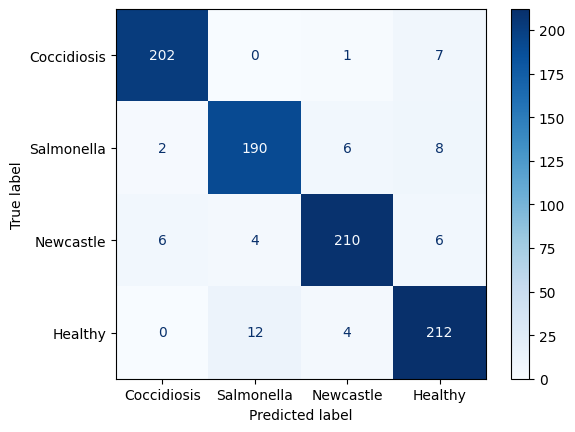

In [19]:
get_metric(model=cnn_model,
           X=X_valid,
           name_model="Cnn Model",
           y_actual=y_valid,
           figsize=(12, 10))

        loss  accuracy  val_loss  val_accuracy
20  0.210396  0.902029  0.246399      0.935632
21  0.208870  0.903755  0.231898      0.931035
22  0.204870  0.907783  0.249950      0.935632
23  0.213140  0.908646  0.274316      0.921839
24  0.204629  0.914257  0.217535      0.935632


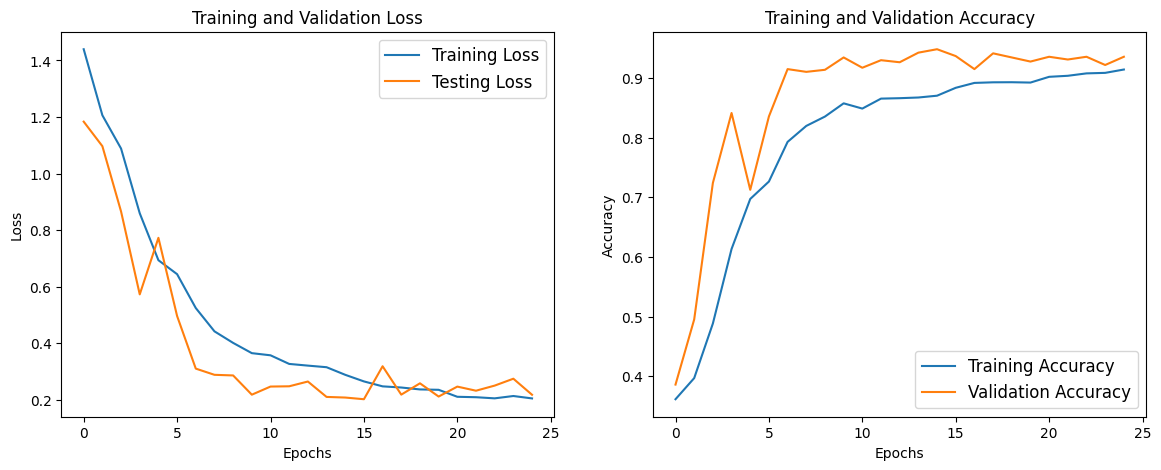

In [20]:
# See history of model  training
histort_cnn_model = pd.read_csv("C:\\Users\\HP\\Desktop\\Data\\Poultry_disease_detection_final\\Models\\cnn\\history_cnn_model16.csv")
plot_graph(histort_cnn_model)
print(histort_cnn_model.tail())

## 04- Transfer Learning and Fine Tuning MobileNetV2 Model

In [ ]:
# path of model 
mobnv2_tf_path = "../model/mobilenetV2/mobilenetv2.h5"
mobnv2_ft_path = "../model/mobilenetV2/mobilenetv2_ft.h5"

# load model 
mobnv2_tf_model = load_model(model_path=mobnv2_tf_path)
mobnv2_ft_model = load_model(model_path=mobnv2_ft_path)

In [ ]:
# check model summary
# Total params: 2,263,108 parameters (equal params between transfer learning and fine tuning )
# Get file size in bytes for a given model
print(f"Size of MobileNetV2 transfer learning model(MB): {(os.stat(mobnv2_tf_path).st_size/1_048_576)}") # convert Bytes to MB
print(f"Size of MobileNetV2 fine tuning model(MB): {(os.stat(mobnv2_ft_path).st_size/1_048_576)}")

In [ ]:
# check model summary
# Trainable params: 5,124
mobnv2_tf_model.summary()

In [ ]:
# check model summary
# Trainable params: 1,866,564
mobnv2_ft_model.summary()

In [ ]:
# See confusion_matrix of model 
get_metric(model=mobnv2_tf_model,
          X=X_valid,
          name_model="MobileNetV2 Transfer Learning Model",
          y_actual=y_valid)

In [ ]:
# See confusion_matrix of model 
get_metric(model=mobnv2_ft_model,
          X=X_valid,
          name_model="MobileNetV2 Fine Tuning Model",
          y_actual=y_valid)

In [ ]:
# See history of model training both transfer learing or fine tuning
histort_mobnv2_tf_model = pd.read_csv("../model/mobilenetV2/history_mobilenetv2.csv", index_col="Unnamed: 0")
histort_mobnv2_ft_model = pd.read_csv("../model/mobilenetV2/history_mobilenetv2_ft.csv", index_col="Unnamed: 0")
histort_mobnv2_model = pd.concat([histort_mobnv2_tf_model, histort_mobnv2_ft_model], ignore_index=True)
histort_mobnv2_model.tail()

In [ ]:
# See only history of model training transfer learing
histort_mobnv2_tf_model.tail()

In [ ]:
# Show graph
plot_graph(histort_mobnv2_model,finetune=True, initial_epochs=25)

## 05- Transfer Learning and Fine Tuning VGG16 Model

In [ ]:
# Create dataframe of validation and testing dataset 
# for model VGG16 
# Using input image size 224x224
img_height= 224
img_width= 224
df_valid_224 = created_dataset(DIR=valid_dir)
df_test_224 = created_dataset(DIR=test_dir)

In [ ]:
# Define X and y and reshape
X_valid_224 = np.array([i for i in df_valid_224["picture"]]).reshape(-1, img_height,img_width, 3)/ 255.0
y_valid_224 = df_valid_224["labels"]
X_test_224 = np.array([i for i in df_test_224["picture"]]).reshape(-1, img_height,img_width, 3)/ 255.0
y_test_224 = df_test_224["labels"]

In [ ]:
# Check shape before prediction with model
X_valid_224.shape, y_valid_224.shape, X_test_224.shape, y_test_224.shape

In [ ]:
# path of model 
vgg16_tf_path = "../model/vgg16/vgg_16.h5"
vgg16_ft_path = "../model/vgg16/vgg_16_ft.h5"

# load model 
vgg16_tf_model = load_model(model_path=vgg16_tf_path)
vgg16_ft_model = load_model(model_path=vgg16_ft_path)

In [ ]:
# check model summary
# Total params: 14,716,740 parameters (equal params between transfer learning and fine tuning )
# Get file size in bytes for a given model
print(f"Size of VGG16 transfer learning model(MB): {(os.stat(vgg16_tf_path).st_size/1_048_576)}") # convert Bytes to MB
print(f"Size of VGG16 fine tuning model(MB): {(os.stat(vgg16_ft_path).st_size/1_048_576)}")

In [ ]:
# check model summary
vgg16_tf_model.summary()

In [ ]:
# check model summary
vgg16_ft_model.summary()

In [ ]:
# See confusion_matrix of model 
get_metric(model=vgg16_tf_model,
          X=X_valid_224,
          name_model="VGG16 Transfer Learning Model",
          y_actual=y_valid_224)

In [ ]:
# See confusion_matrix of model 
get_metric(model=vgg16_ft_model,
          X=X_valid_224,
          name_model="VGG16 Fine Tuning Model",
          y_actual=y_valid_224)

In [ ]:
# See history of model training both transfer learing or fine tuning
histort_vgg16_tf_model = pd.read_csv("../model/vgg16/history_vgg16.csv", index_col="Unnamed: 0")
histort_vgg16_ft_model = pd.read_csv("../model/vgg16/history_vgg16_ft.csv", index_col="Unnamed: 0")
histort_vgg16_model = pd.concat([histort_vgg16_tf_model, histort_vgg16_ft_model], ignore_index=True)
histort_vgg16_model.tail()

In [ ]:
# See only history of model training transfer learing
histort_vgg16_tf_model.tail()

In [ ]:
# plot graph
plot_graph(histort_vgg16_model,finetune=True, initial_epochs=25)

## 06- Model Comparison

In [ ]:
# list 
model_name, loss, val_loss, accuracy, val_accuracy, F1_score, size_mb, number_params, input_size =  [],[],[],[],[],[],[],[],[]

In [ ]:
# Check shape before prediction with model of CNN and MobileNetV2
X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

In [ ]:
# Check shape before prediction with model of VGG16
X_valid_224.shape, y_valid_224.shape, X_test_224.shape, y_test_224.shape

In [ ]:
# Cnn model
get_values_model(X_valid, 
                 y_valid, 
                 history_model=histort_cnn_model,
                 model=cnn_model,
                 name_model="CNN_Baseline",
                 model_path=cnn_path)

In [ ]:
# MobileNetV2 Transfer learning
get_values_model(X_valid, 
                 y_valid, 
                 history_model=histort_mobnv2_tf_model,
                 model=mobnv2_tf_model,
                 name_model="MobileNetV2_tf",
                 model_path=mobnv2_tf_path)

# MobileNetV2 Fine_tuning
get_values_model(X_valid, 
                 y_valid, 
                 history_model=histort_mobnv2_ft_model,
                 model=mobnv2_ft_model,
                 name_model="MobileNetV2_ft",
                 model_path=mobnv2_ft_path)

In [ ]:
# VGG16 Transfer learning
get_values_model(X=X_valid_224, 
                 y_actual=y_valid_224, 
                 history_model=histort_vgg16_tf_model,
                 model=vgg16_tf_model,
                 name_model="VGG16_tf",
                 model_path=vgg16_tf_path)

# VGG16 Fine_tuning
get_values_model(X=X_valid_224, 
                 y_actual=y_valid_224, 
                 history_model=histort_vgg16_ft_model,
                 model=vgg16_ft_model,
                 name_model="VGG16_ft",
                 model_path=vgg16_ft_path)

In [ ]:
# Create Dataframe
result_model = pd.DataFrame(data = [model_name, loss, val_loss, accuracy, val_accuracy, F1_score, size_mb, number_params, input_size],\
               index = ['model_name','loss','val_loss','accuracy','val_accuracy','F1_score','size_mb','number_params', "input_size"])

In [ ]:
# Show results
result_model

## 07- Select Best Model

In [ ]:
# MobileNetV2 Transfer learning in testing dataset
get_values_model(X=X_test, 
                 y_actual=y_test, 
                 history_model=histort_mobnv2_tf_model,
                 model=mobnv2_tf_model,
                 name_model="MobileNetV2_tf_bestmodel",
                 model_path=mobnv2_tf_path)

In [ ]:
# Create Dataframe
selected_model = pd.DataFrame(data = [model_name, loss, val_loss, accuracy, val_accuracy, F1_score, size_mb, number_params, input_size],\
               index = ['model_name','loss','val_loss','accuracy','val_accuracy','F1_score','size_mb','number_params', "input_size"])

In [ ]:
# Show metric of selected model MobileNetV2_tf_bestmodel
selected_model[[5]]

In [ ]:
# See confusion_matrix of selected model 
get_metric(model=mobnv2_tf_model,
          X=X_test,
          name_model="MobileNetV2 Model",
          y_actual=y_test)

## 08- Testing with Selected Model

In [ ]:
# Test actual picture form Thailand farmer 
model = mobnv2_tf_model

# load image
path = "../picture/healthy_thai_1.jpg"
img = keras.preprocessing.image.load_img(path, target_size=(img_height, img_width))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Predict
predictions = model.predict(img_array*1/255.)
score = tf.nn.softmax(predictions[0])
display(Image(filename=path))
print("This image most likely belongs to {} with a {:.2f} percent confidence."
.format([j for j in labels_dict if labels_dict[j] == np.argmax(score)][0], 100 * np.max(score)))

In [ ]:
# Test actual picture form Thailand farmer 
model = mobnv2_tf_model

# load image
path = "../picture/healthy_thai_2.jpg"
img = keras.preprocessing.image.load_img(path, target_size=(img_height, img_width))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Predict
predictions = model.predict(img_array*1/255.)
score = tf.nn.softmax(predictions[0])
display(Image(filename=path))
print("This image most likely belongs to {} with a {:.2f} percent confidence."
.format([j for j in labels_dict if labels_dict[j] == np.argmax(score)][0], 100 * np.max(score)))